In [3]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [4]:
movies_data = pd.read_csv('/home/hitesh/Desktop/Github/Movie-Recommendation-System/Movielens dataset/movies.csv')
movies_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings_data = pd.read_csv('/home/hitesh/Desktop/Github/Movie-Recommendation-System/Movielens dataset/ratings.csv')
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
print('Movies_df Shape:',movies_data.shape)
print('Ratings_df Shape:',ratings_data.shape)

Movies_df Shape: (9742, 3)
Ratings_df Shape: (100836, 4)


In [9]:
movies_data['year'] = movies_data.title.str.extract('(\d\d\d\d)',expand=True)
movies_data['title'] = movies_data.title.str.replace('(\(\d\d\d\d\))', '')
movies_data['title'] = movies_data['title'].apply(lambda x: x.strip())
movies_data.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


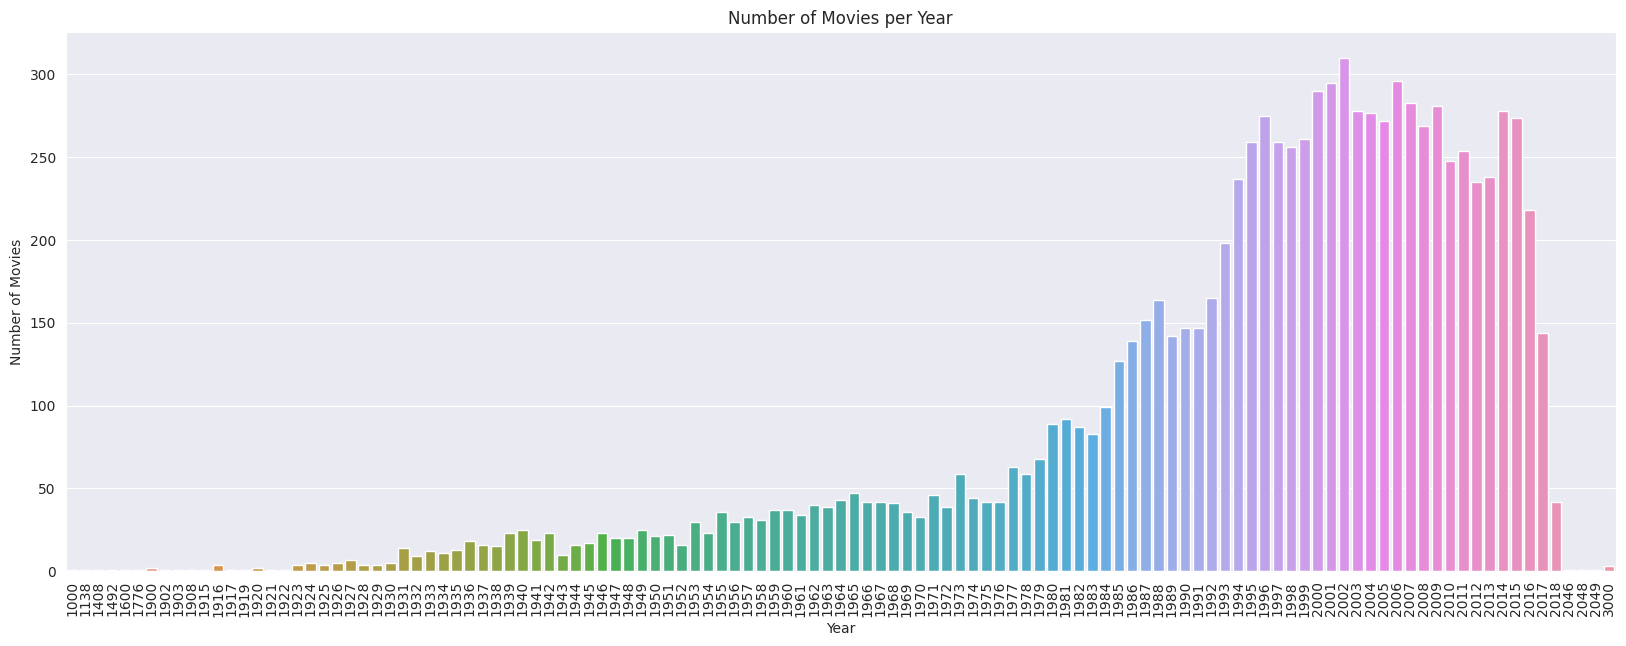

In [33]:
plt.figure(figsize=(20,7))
movies_data_year = movies_data.sort_values(by='year')
sns.countplot(x=movies_data_year['year'], data=movies_data_year)
plt.title('Number of Movies per Year')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Number of Movies')
plt.show()

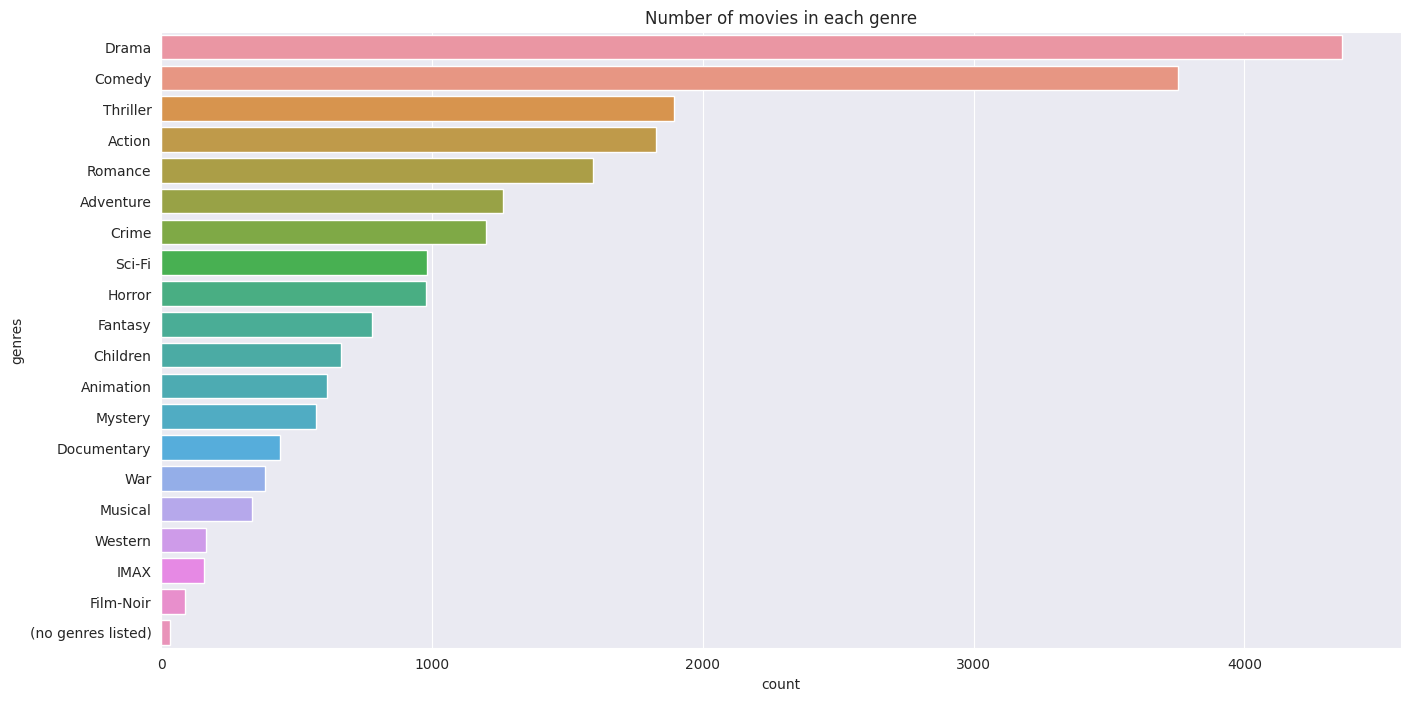

In [39]:
plt.figure(figsize=(16,8))
movies_data['genres'] = movies_data['genres'].str.split('|')
movies_data_genre = movies_data.explode('genres')
sns.countplot(y=movies_data_genre['genres'], order=movies_data_genre['genres'].value_counts().index)
plt.title('Number of movies in each genre')
plt.show()

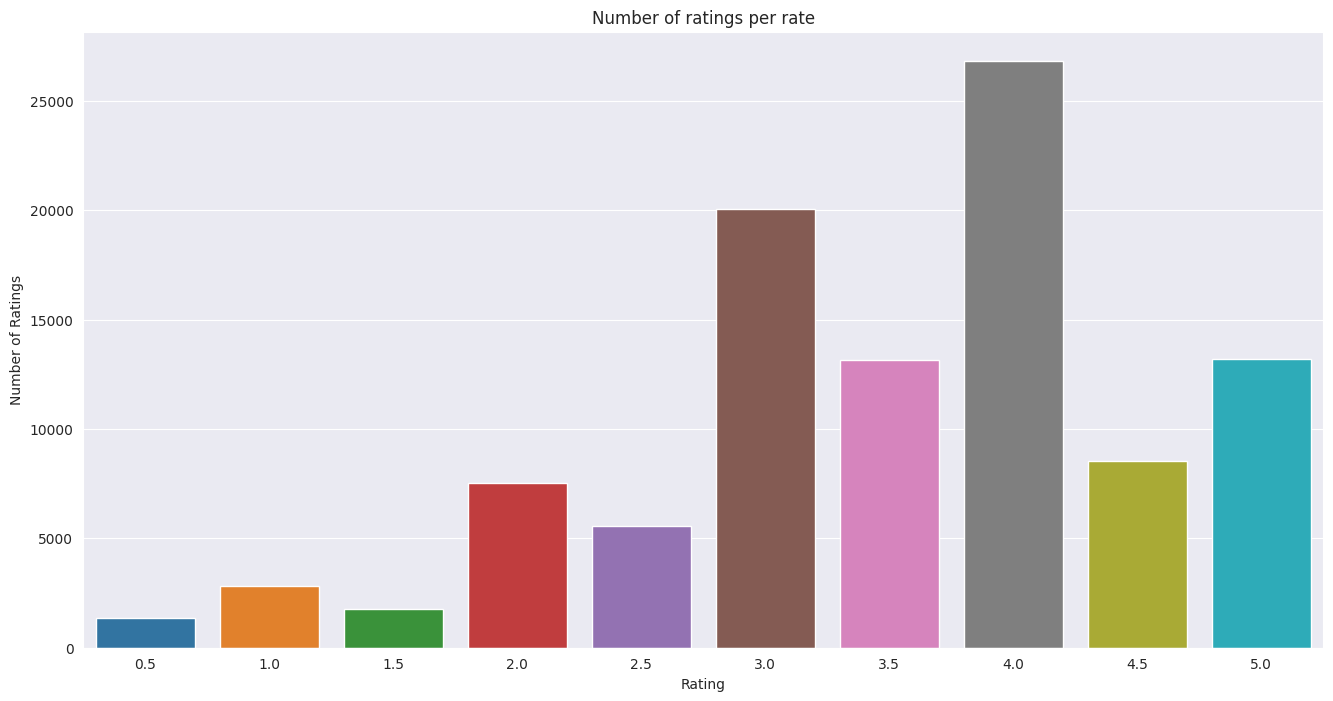

In [43]:
plt.figure(figsize=(16,8))
sns.countplot(x=ratings_data['rating'], data=ratings_data)
plt.title('Number of ratings per rate')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()

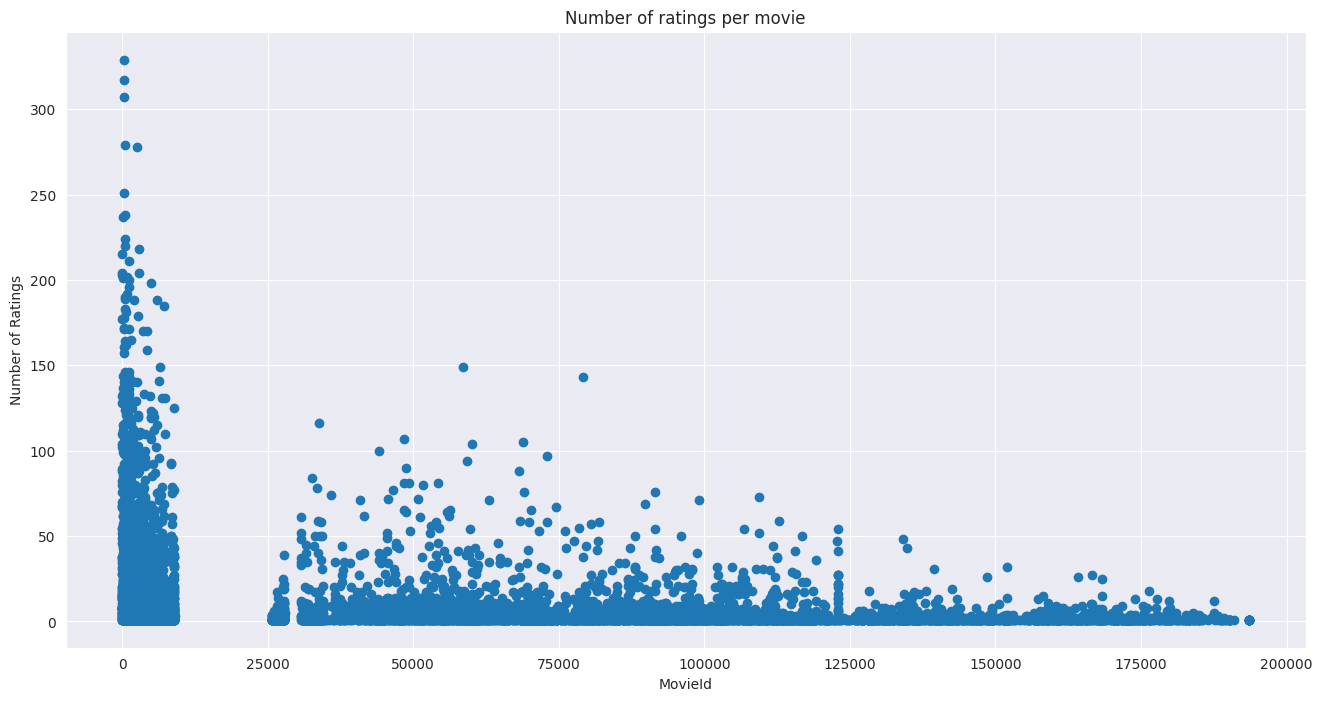

In [99]:
ratings_data_count = pd.DataFrame(ratings_data.groupby('movieId')['rating'].count())
ratings_data_count = ratings_data_count.rename(columns={'rating': 'num_ratings'})
ratings_data_count = ratings_data_count.sort_values('num_ratings', ascending=False)
plt.figure(figsize=(16,8))
plt.scatter(ratings_data_count.index, ratings_data_count['num_ratings'])
plt.title('Number of ratings per movie')
plt.xlabel('MovieId')
plt.ylabel('Number of Ratings')
plt.show()

### Extra of movies_metadata.csv

In [29]:
movies = pd.read_csv('/home/hitesh/Desktop/Data Science Project/Movie-Recommendation-System/movie_metadata.csv')
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [30]:
print("Dataframe Shape: ", movies.shape)
movies.dtypes

Dataframe Shape:  (5043, 28)


color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [31]:
## read the number of missing values in each column of the dataset for every column
print(movies.isnull().sum())
movies = movies.dropna()


color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64


In [32]:
## get unique value in each of the column of the dataset which has non numeric values
print(movies['color'].unique())
print(movies['director_name'].unique())
print(movies['actor_2_name'].unique())
print(movies['actor_1_name'].unique())
print(movies['actor_3_name'].unique())
print(movies['language'].unique())
print(movies['country'].unique())
print(movies['content_rating'].unique())

['Color' ' Black and White']
['James Cameron' 'Gore Verbinski' 'Sam Mendes' ... 'Kevin Jordan'
 'Jafar Panahi' 'Shane Carruth']
['Joel David Moore' 'Orlando Bloom' 'Rory Kinnear' ... 'David Sullivan'
 'Peter Marquardt' 'Brian Herzlinger']
['CCH Pounder' 'Johnny Depp' 'Christoph Waltz' ... 'Shane Carruth'
 'Carlos Gallardo' 'John August']
['Wes Studi' 'Jack Davenport' 'Stephanie Sigman' ... 'Casey Gooden'
 'Consuelo Gómez' 'Jon Gunn']
['English' 'Mandarin' 'Aboriginal' 'Spanish' 'French' 'Filipino' 'Maya'
 'Kazakh' 'Cantonese' 'Japanese' 'Aramaic' 'Italian' 'Dutch' 'Dari'
 'German' 'Mongolian' 'Thai' 'Bosnian' 'Korean' 'Hungarian' 'Hindi'
 'Danish' 'Portuguese' 'Norwegian' 'Czech' 'Russian' 'Zulu' 'Hebrew'
 'Arabic' 'Vietnamese' 'Indonesian' 'Romanian' 'Persian']
['USA' 'UK' 'New Zealand' 'Canada' 'Australia' 'Germany' 'China'
 'New Line' 'France' 'Japan' 'Spain' 'Hong Kong' 'Czech Republic' 'Peru'
 'South Korea' 'Aruba' 'Denmark' 'Ireland' 'South Africa' 'Italy'
 'Romania' 'Chile' 'Net

In [33]:
## I want to see the number of movies in each of the genre and get the graph of it 
## so first I will split the genre column and then count the number of movies in each genre
## and then plot the grap.write code for it 
movies['genres'] = movies['genres'].str.split('|')
movies['genres'].head()
## how to count the number of movies in each genre
## I will use the explode function to split the genre column and then count the number of movies in each genre
movies = movies.explode('genres')


In [34]:

# want to view clumn from 10 to 20
movies.iloc[:,12:20].head()

,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language
0,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English
0,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English
0,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English
0,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English
1,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English


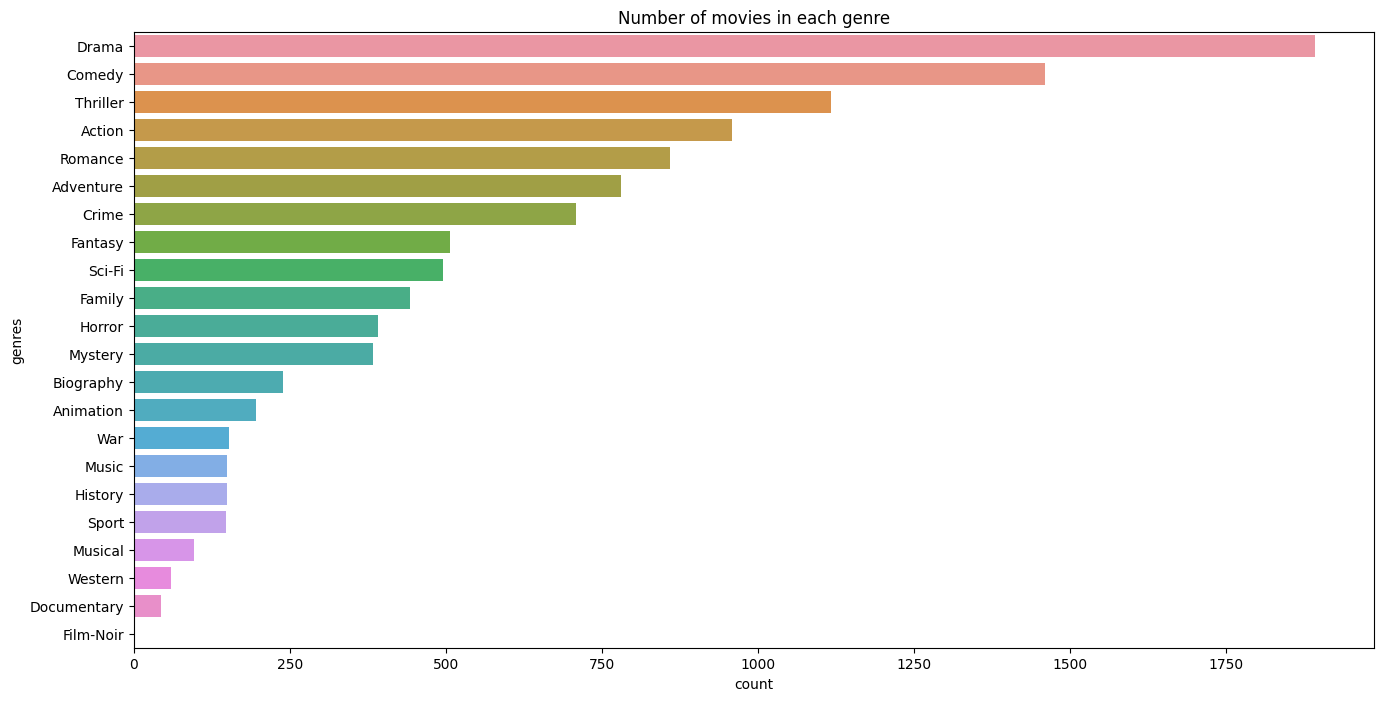

In [35]:
## now I will plot the graph of the number of movies in each genre
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,8))
sns.countplot(y=movies['genres'], order=movies['genres'].value_counts().index)
plt.title('Number of movies in each genre')
plt.show()


### Movies Cluster formation

In [49]:
movies = pd.read_csv('/home/hitesh/Desktop/Data Science Project/Movie-Recommendation-System/movie_metadata.csv')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
movies['color'] = le.fit_transform(movies['color'])
movies = movies.dropna()


In [50]:
genres = movies['genres'].str.get_dummies('|')
movies = pd.concat([movies, genres], axis=1)


In [51]:
genres.columns

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [52]:
### vectorise other columns which arw not numeric using TFIDF VECTORISER
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
movies['actor_1_name'] = movies['actor_1_name'].fillna('')
movies['actor_2_name'] = movies['actor_2_name'].fillna('')
movies['actor_3_name'] = movies['actor_3_name'].fillna('')
movies['director_name'] = movies['director_name'].fillna('')
movies['plot_keywords'] = movies['plot_keywords'].fillna('')
movies['movie_title'] = movies['movie_title'].fillna('')
movies['comb'] = movies['movie_title']+' '+ movies['plot_keywords'].str.replace('|',' ')


In [53]:
tfidf_matrix = tfidf.fit_transform(movies['comb'])
tfidf_matrix.shape

(3756, 7277)

In [54]:
## scaling of the numeric columns data in movies df
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
movies[['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']] = scaler.fit_transform(movies[['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']])
movies.head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,comb
0,1,James Cameron,0.889026,0.481229,0.000000,0.037174,Joel David Moore,0.001563,1.000000,Action|Adventure|Fantasy|Sci-Fi,...,0,0,0,0,1,0,0,0,0,Avatar avatar future marine native paraplegic
1,1,Gore Verbinski,0.369914,0.450512,0.024478,0.043478,Orlando Bloom,0.062500,0.406840,Action|Adventure|Fantasy,...,0,0,0,0,0,0,0,0,0,Pirates of the Caribbean: At World's End godd...
2,1,Sam Mendes,0.739827,0.378840,0.000000,0.007000,Rory Kinnear,0.017188,0.263080,Action|Adventure|Thriller,...,0,0,0,0,0,0,1,0,0,Spectre bomb espionage sequel spy terrorist
3,1,Christopher Nolan,1.000000,0.433447,0.956522,1.000000,Christian Bale,0.042188,0.589253,Action|Thriller,...,0,0,0,0,0,0,1,0,0,The Dark Knight Rises deception imprisonment ...
5,1,Andrew Stanton,0.567201,0.324232,0.020652,0.023043,Samantha Morton,0.001000,0.096066,Action|Adventure|Sci-Fi,...,0,0,0,0,1,0,0,0,0,John Carter alien american civil war male nip...


In [55]:
from scipy.sparse import hstack
from scipy.sparse import csr_matrix
movies_numeric = csr_matrix(movies[['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']])
movies_encoder = csr_matrix(movies[['color', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western']])
movies_stacked = hstack((tfidf_matrix,movies_numeric, movies_encoder)).tocsr()
movies_stacked.shape

(3756, 7316)

In [70]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
km.fit(movies_stacked)
cluster = km.labels_.tolist()
movies['cluster'] = cluster


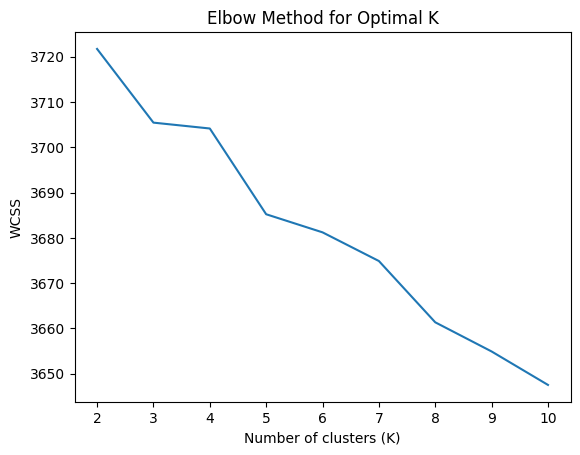

In [66]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# create a list of K values to evaluate
k_values = range(2, 11)

# compute the within-cluster sum of squares (WCSS) for each K value
wcss = []
for k in k_values:
    km = KMeans(n_clusters=k)
    km.fit(tfidf_matrix)
    wcss.append(km.inertia_)

# plot the WCSS values against the K values to visualize the elbow method
plt.plot(k_values, wcss)
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

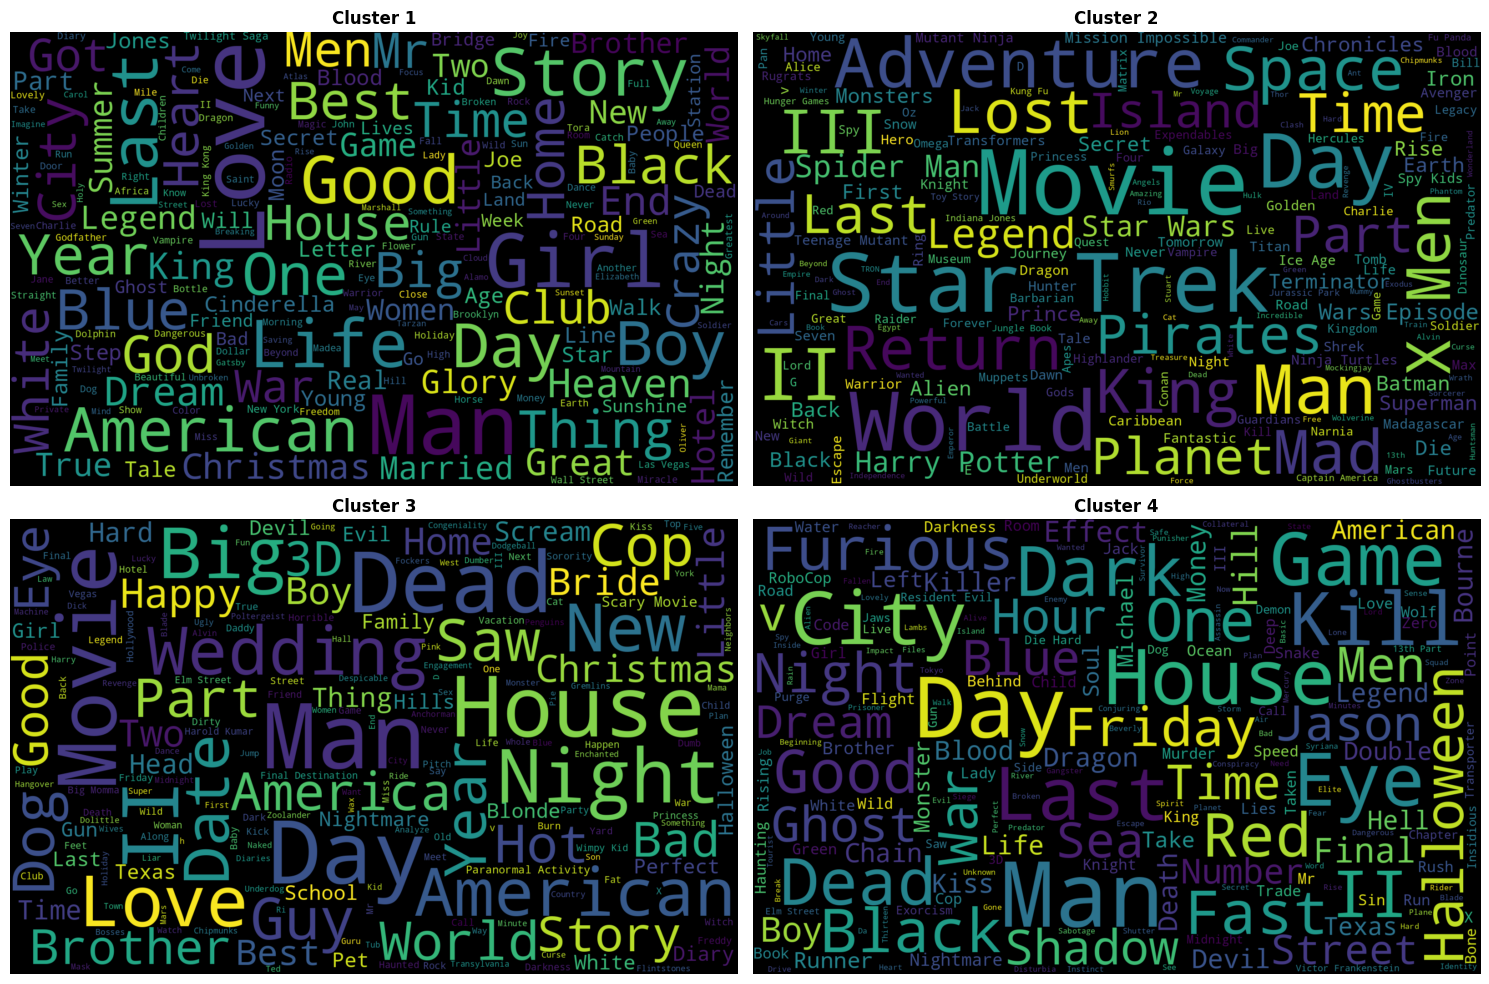

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for i, ax in enumerate(axs.flat):
    movies_cluster_1 = movies[movies['cluster'] == i]
    text = " ".join(movies_cluster_1['movie_title'])
    wordcloud = WordCloud(width=1600, height=1000, max_font_size=200).generate(text)
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.set_title("Cluster {}".format(i+1), fontweight='bold') # make title bold
    ax.axis("off")

plt.tight_layout()
plt.show()

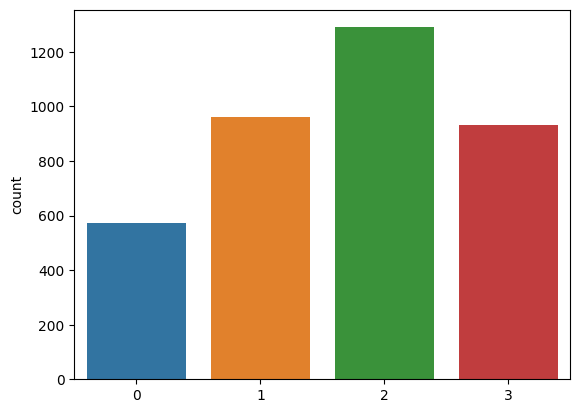

In [68]:
# write sns count plot without order

import seaborn as sns
sns.countplot(x=cluster, data=movies)
plt.show()

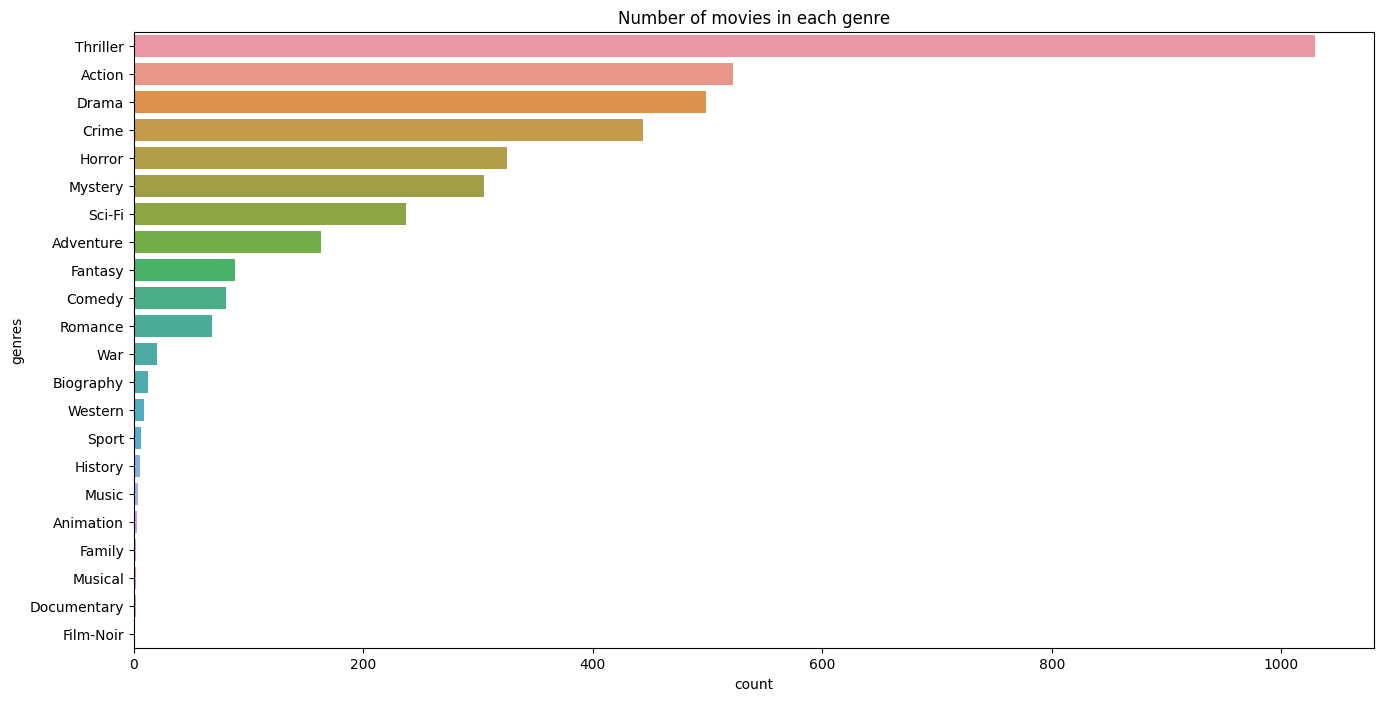

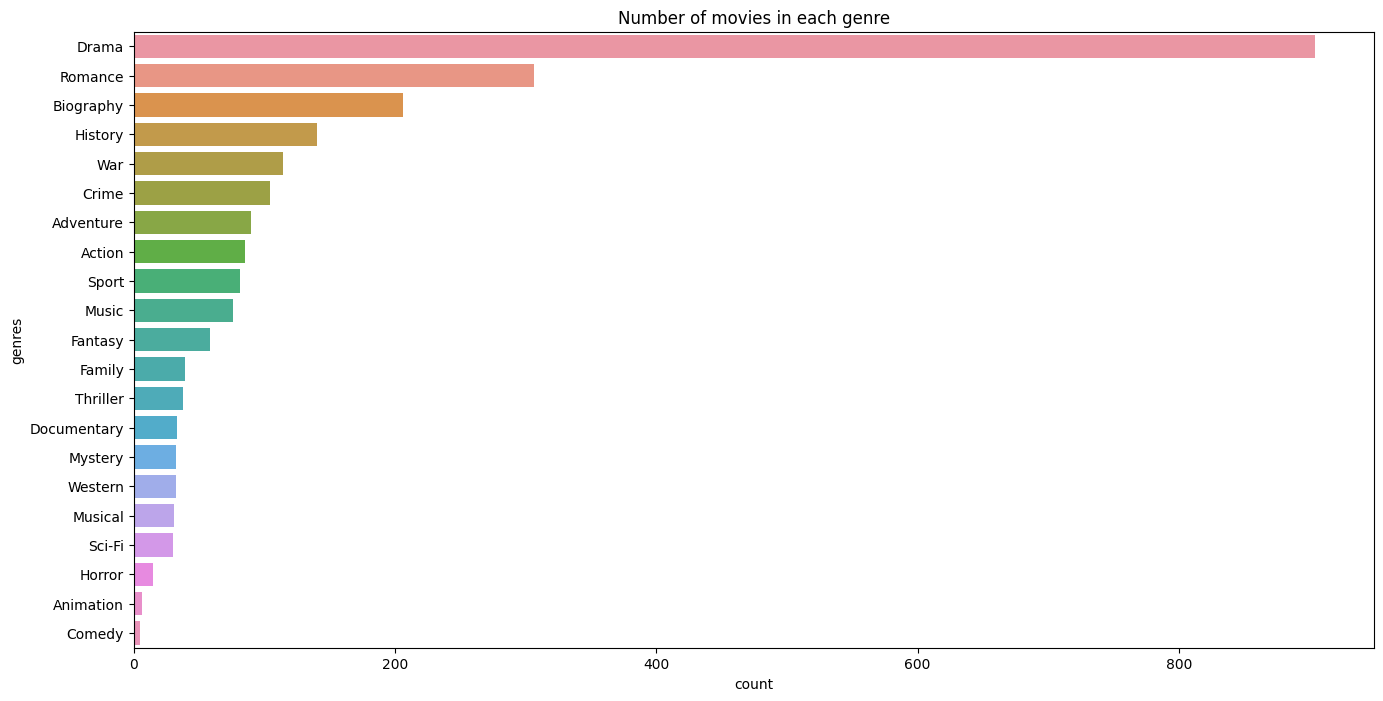

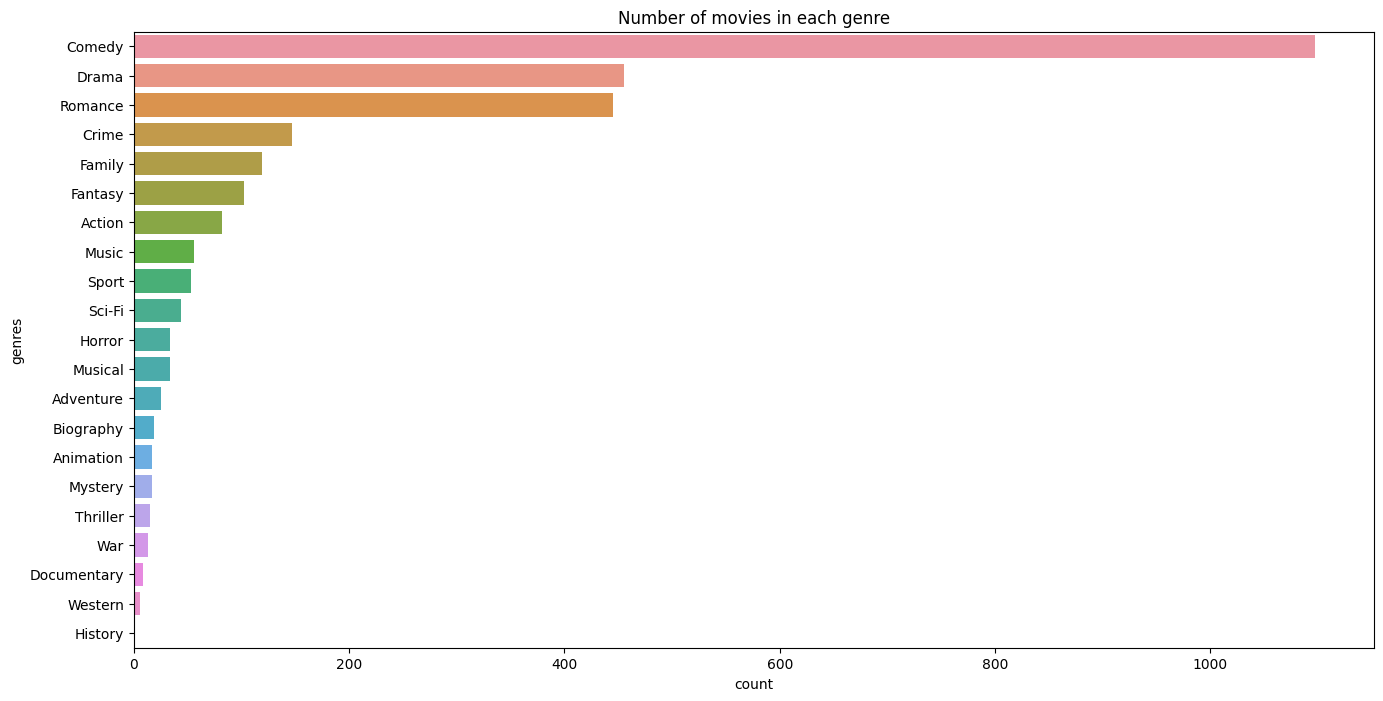

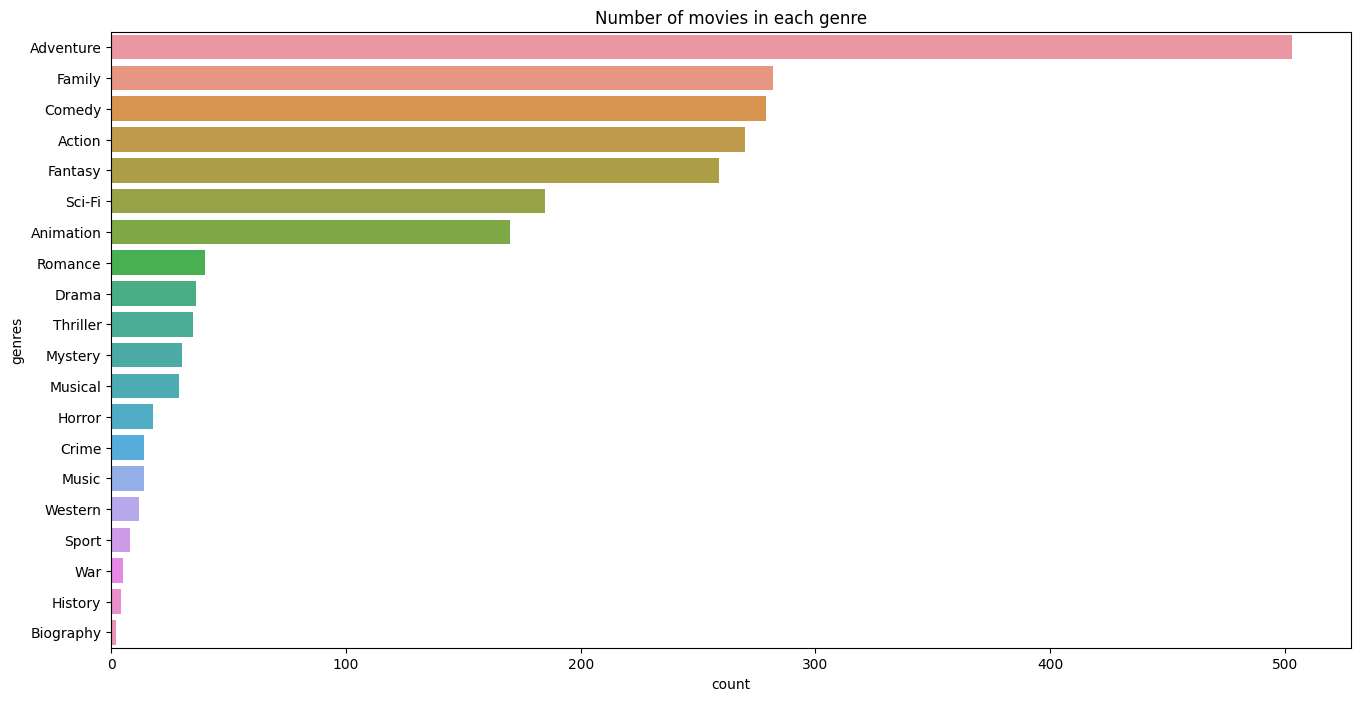

In [80]:
for i in range(4):
    movies_cluster_1 = movies[movies['cluster']==i]
    movies_cluster_1['genres'] = movies_cluster_1['genres'].str.split('|')
    movies_cluster_1['genres'].head()
    movies_cluster_1 = movies_cluster_1.explode('genres')
    plt.figure(figsize=(16,8))
    sns.countplot(y=movies_cluster_1['genres'], order=movies_cluster_1['genres'].value_counts().index)
    plt.title('Number of movies in each genre')
    plt.show()
